In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
#df = pd.read_csv("IMDb movies.csv")
url = 'https://github.com/kito323/02450movies/raw/master/IMDb_movies.csv'
categories = ['year', 'genre','duration', 'avg_vote','votes','metascore','reviews_from_users','reviews_from_critics']
df = pd.read_csv("02450movies/IMDb_movies.csv", usecols=categories)

In [264]:
df.head(3)

,year,genre,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
0,1894,Romance,45,5.9,154,NaN,1.0,2.0
1,1906,"Biography, Crime, Drama",70,6.1,589,NaN,7.0,7.0
2,1911,Drama,53,5.8,188,NaN,5.0,2.0


In [265]:
df.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,1993.500891,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,24.216420,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,1894.000000,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,2003.000000,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,2013.000000,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,2020.000000,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [266]:
#sort dataframe on dates
df2 = np.array(df)
df_sorted = df2[df2[:,0].argsort()]
df = pd.DataFrame(df_sorted, columns=categories)
N = 5000
df_end = df.iloc[-N:]

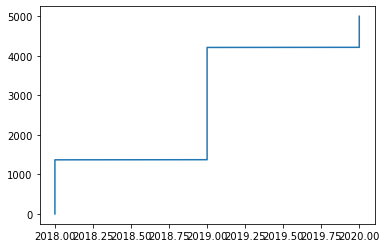

In [267]:
plt.figure()
plt.plot(df_end['year'], range(N))
plt.show()

In [268]:
for i in range(len(df_end['genre'])):
    df_end.iloc[i,1] = df_end.iloc[i,1].split(sep=', ')

C:\Users\andre\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [270]:
pd.set_option('display.max_columns', None)
#https://stackoverflow.com/a/47786880
dfk = df_end['genre'].str.join('|').str.get_dummies()
df = pd.concat([df_end,dfk], axis=1).drop(columns='genre')
df

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
80855,2018,85,4.5,431,NaN,2,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80856,2018,82,6.1,122,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80857,2018,90,4.8,393,NaN,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80858,2018,124,6.5,359,NaN,18,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80859,2018,102,5.8,246,NaN,NaN,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,2020,92,6.3,255,NaN,3,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
85851,2020,99,6.5,74639,47,1018,250,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85852,2020,151,7.2,407,81,4,28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85853,2020,97,5.7,666,NaN,9,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
